In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Mental_Health = pd.read_csv('Datasheet/Mental_Health_train.csv')

In [3]:
Mental_Health.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [6]:
Mental_Health['Name'].value_counts()

Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64

In [7]:
name_counts = Mental_Health['Name'].value_counts()

In [28]:
frequent_names = name_counts[name_counts > 999].index

In [29]:
df_frequent = Mental_Health[Mental_Health['Name'].isin(frequent_names)]

In [30]:
# Group by name and depression status, then count
grouped = df_frequent.groupby(['Name', 'Depression']).size().unstack(fill_value=0)

In [31]:
df_frequent.groupby(['Name', 'Depression']).size().unstack(fill_value=0)

Depression,0,1
Name,,
Aaradhya,1647,398
Aarav,1801,535
Aariv,1102,152
Aarush,949,317
Abhishek,927,325
Anand,1022,464
Aniket,813,210
Ansh,1206,217
Anushka,1006,273


In [32]:
# Calculate the total count for each name
grouped['total'] = grouped[1] + grouped[0]

In [33]:
# Calculate the proportion of depression for each name
grouped['depression_proportion'] = grouped[1] / grouped['total']

In [34]:
# Sort by proportion for better visualization (optional)
grouped = grouped.sort_values('depression_proportion', ascending=False)

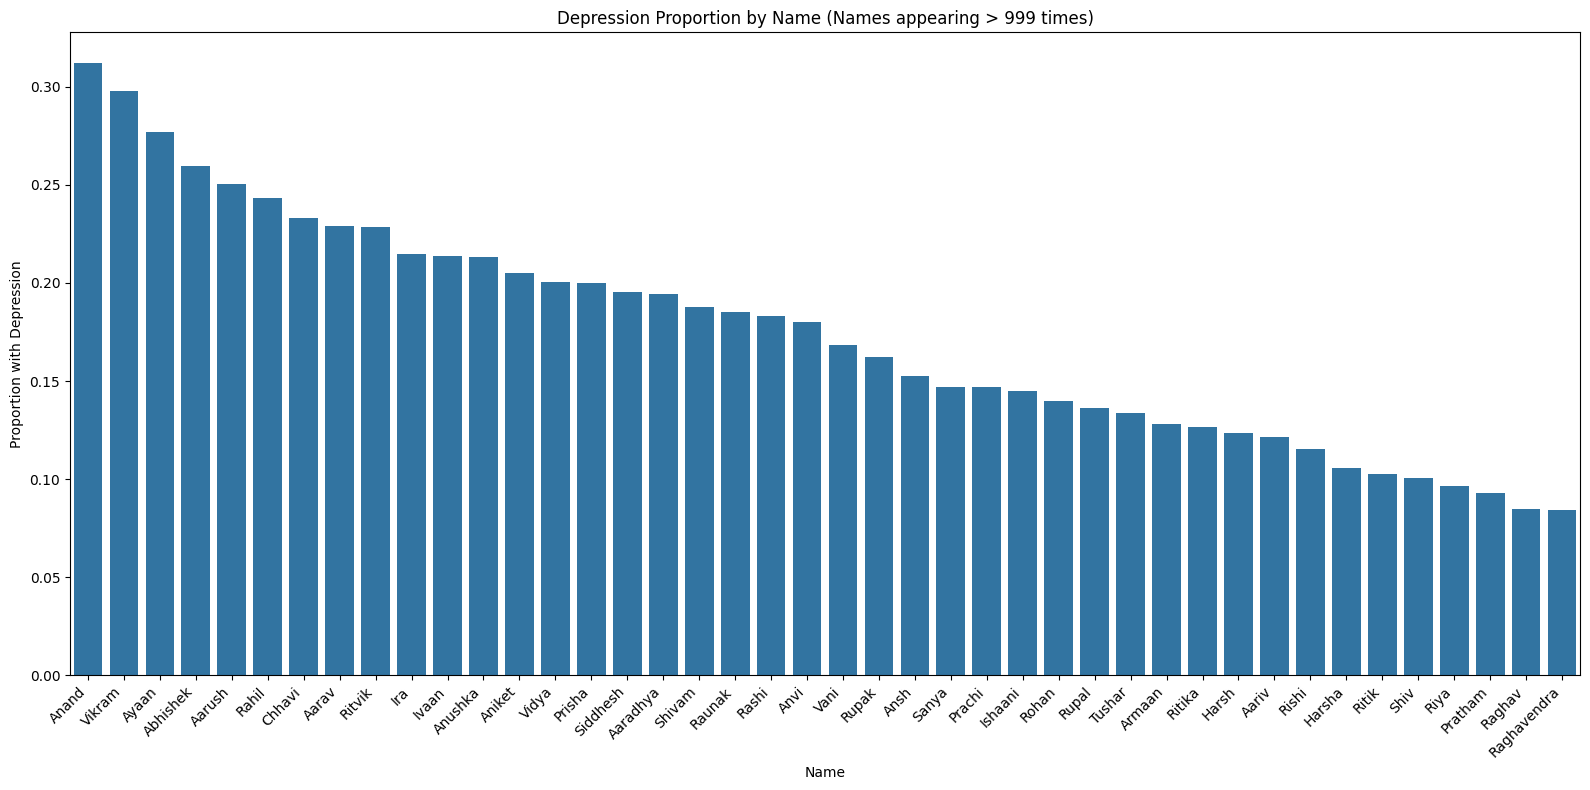

In [36]:
# Plotting with Seaborn
plt.figure(figsize=(16, 8))  # Adjust figure size as needed

# Create the bar plot using Seaborn
sns.barplot(x=grouped.index, y='depression_proportion', data=grouped.reset_index())

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Name")
plt.ylabel("Proportion with Depression")
plt.title("Depression Proportion by Name (Names appearing > 999 times)")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('fig_Name999.png')
plt.show()